In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import ensemble

%matplotlib nbagg

In [2]:
dataOG = pd.read_csv('DataSet/Exoplanets-Kepler-objects_04_02_2020.csv', header=86)
#Read data into pandas dataframe, ignoring the notes at the start of the csv

data = dataOG[['koi_prad','koi_incl','koi_dor','koi_count','koi_depth','koi_max_mult_ev','koi_fwm_stat_sig','koi_impact',
               'koi_max_sngle_ev','koi_dicco_mra','koi_disposition']]
#Create a copy of the data so as to not alter the original data

data = data.dropna()
#Remove all NaN Values

print('Original Data Length:' ,len(dataOG['koi_prad']))
print('Data Without NaNs Length:',len(data['koi_prad']))
nanValuesFound =   len(dataOG) - len(data)
print('Nan Values Found:',nanValuesFound)
#Compare lengths to see how many NaN values there are

Original Data Length: 7470
Data Without NaNs Length: 6837
Nan Values Found: 633


# Cleaning Data

Upon inspection of the data, it is clear some of the rows are missing values, so to clean the data we remove these values

However, there are a lot of clumns that we are uninterested in, and therefore to remove a whole row of data because one column has a NaN is pointless, therefore we first only take the rows we are interested in

# Analysis of Cleaning

We have only found 633 NaN's hence a very smnall amount of the data is removed, meaning it likely has little to no effect on the statistics.

## KOI_disposition

This column doesnt contain numbers, it instead contains strings
These strings are False Positive, Confirmed, candidate
These can be converted to numerical catagories 0, 1, 2 Which is what the next code cell does

In [3]:
encoder = LabelEncoder()
#Create encoder

encoder.fit(data['koi_disposition'])
#Create the encoder fit

catagories = list(encoder.classes_)
print(catagories)
print(encoder.transform(catagories))
#Get List of catagories and Their conversions

dispositionEncoded = encoder.transform(data['koi_disposition'])

['CANDIDATE', 'CONFIRMED', 'FALSE POSITIVE']
[0 1 2]


# Removing Candidate Values

We only want to look at the values which are confirmed hence we remove the candiate values in the next cell

In [4]:
candidateLocations = np.where(dispositionEncoded == 0)
print('Number of candidate Values:',len(candidateLocations[0]))
#Find all candidate Values

dispositionEncodedNew = np.delete(dispositionEncoded, candidateLocations)
data = data.drop(data.index[candidateLocations[0]])
#Remove values for candidate from dataframe

print(len(data),len(dispositionEncodedNew))
#Check lengths are still same

Number of candidate Values: 1926
4911 4911


In [5]:
dispositionEncodedNew = np.array(dispositionEncodedNew)
dispositionEncodedNew -= 1
#Convert 1,2 to 0,1 in disposition values

# Section 1: Visualisation

In this section I will visualise some important factors of the dataset and use that to identify any possible relations between characteristics

<IPython.core.display.Javascript object>


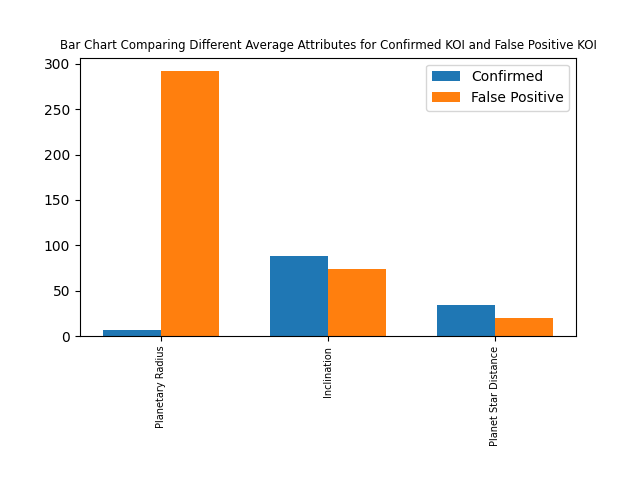

In [33]:
fig, axes = plt.subplots()
#Create figure and axes to plot on

x = ['Planetary Radius','Inclination', 'Planet Star Distance']
y1 = [np.mean(data['koi_prad'][dispositionEncodedNew==0]),
    np.mean(data['koi_incl'][dispositionEncodedNew==0]),np.mean(data['koi_dor'][dispositionEncodedNew==0])]

y2 = [np.mean(data['koi_prad'][dispositionEncodedNew==1]),
    np.mean(data['koi_incl'][dispositionEncodedNew==1]),np.mean(data['koi_dor'][dispositionEncodedNew==1])]



width = 0.35
xPos = np.array([i for i, _ in enumerate(x)])

axes.bar(xPos - width/2, y1, width, label='Confirmed')
axes.bar(xPos + width/2, y2, width, label='False Positive')
axes.set_xticks(xPos, x,rotation='vertical',size=7)

plt.gcf().subplots_adjust(bottom=0.3)
plt.legend()
plt.title('Bar Chart Comparing Different Average Attributes for Confirmed KOI and False Positive KOI', size=8.5)
plt.show()



# Graph Analysis

From this graph we can see that there is a clear difference between some attributes for Confirmed and Flase Positive KOI's, however this graph doesnt allow us to get any more information than that.

Furthermore, some of the differences are very small hence only the 3 attributes shown here, as the other attributes are too small to be shown on the same graph.

Finally, this graph doesnt really give us a way of predicting the disposition of different KOI's from its attributes as all we can say is that on average, Confirmed KOI's have a smaller planetary radius, higher Inclination and higher Planet Star Distance but we have no mathematical attachment to this.

# Section 2: Regression

In this section I will use a logistic regression to predict the disposition of a KOI, given the:
koi_prad','koi_incl','koi_dor','koi_count','koi_depth','koi_max_mult_ev','koi_fwm_stat_sig','koi_impact',
'koi_max_sngle_ev','koi_dicco_mra'


In [35]:
xData = data[['koi_prad','koi_incl','koi_dor','koi_count','koi_depth','koi_max_mult_ev','koi_fwm_stat_sig','koi_impact',
               'koi_max_sngle_ev','koi_dicco_mra']]

yData = dispositionEncodedNew

xTrain,xTest,yTrain,yTest = train_test_split(xData, yData)
#Split data into training and testing sets

In [36]:
logReg = LogisticRegression(max_iter=10000)
#Create logistic regression

logReg = logReg.fit(xTrain, yTrain)
#Fit the regression to the data

In [37]:
testScore = logReg.score(xTest, yTest)
print('Logistic Regression Score:',testScore)

Logistic Regression Score: 0.8037459283387622


# Analysis of Regression Model

Using the logistic Regression model we arrive at a model that can predict the disposition of a KOI with ~83% accuracy (The accuracy does change every time its calculated as the logistic regression uses a random start that will affect the results each time it is created), which is good considering how computationally simple this method is.

Furthermore, it highlights how a simple model can still be very effective in large dimensional spaces when compared to more complicated models.

# Section 3: Machine Learning

In this section, I will perform the same task as previously, however I will use Random Forrest Classifiers

In [42]:
classifier = ensemble.RandomForestClassifier()
#Create classifier Object

classifier.fit(xTrain, yTrain)
#Fit classifier to data

RandomForestClassifier()

In [43]:
testScoreRF = classifier.score(xTest,yTest)
print('Random Forest Classifier Score:', testScoreRF)

Random Forest Classifier Score: 0.9527687296416938


# Analysis of Random Forest Classifier

From the above code we can see that the Random Forest is exceptionally accurate, reaching an accuracy of 96%, and also extremely effecient, taking a very short amount of time to train.

This suggests that it is an extremely effective model for predicting the KOI disposition.

# Section 4: Conclusions

In section 1 we used graphical methods to try and draw some conclusions about the data, however it is not very effective, as the data has many dimensions making direct visualisation hard and as such we have to sacrifice some dimensions. It is also not very numerically valid as we are effectively just reading from a graph and have no mathematical evidence for any conclusions based solely on the graph. 

In section 2 we used a Logistic regression to try and model the disposition of a KOI. It was reasonably effective, especially considering its simplicity and speed. however it is not perfect, only reaching an accuracy of 83%.

In section 3 we used a Random Forest classifier to perform the same task as section 2, however the random forest classifier was much more accurate (96%), and also slightly quicker on my laptop. Therefore I feel that this method is hands down the best as the usual trade off between speed and accuracy doesnt seem to apply, with this method excelling at both.

